Rotation: -2 degrees = -0.0349 rad


((753, 753), (753, 753))

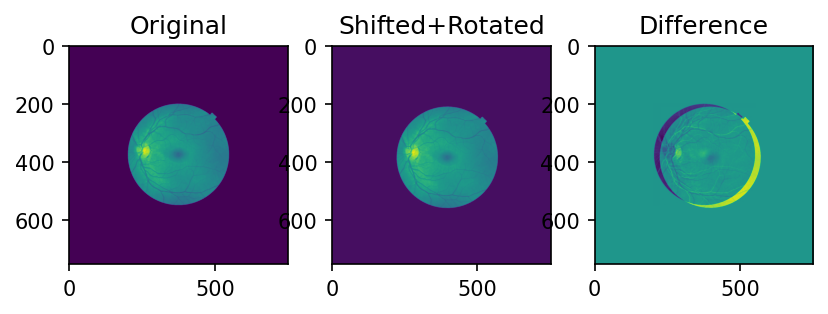

In [94]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage

caller = getattr(data,'retina')
step = 4
image = caller()[0::step,0::step]

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

image = rgb2gray(image) # convert rgb to grayscale

angle = -2 # degrees
print(f"Rotation: {angle} degrees = {angle*np.pi/180:.4f} rad")
rotated_image = scipy.ndimage.rotate(image, angle,reshape=False)

padding = 200
image = np.pad(image,(padding,padding))

shift1 = 20
shift2 = 10
rotated_image = np.pad(rotated_image,(padding,padding))
rotated_image = np.roll(rotated_image,(shift1,shift2),axis=(1,0))

correct_solution = shift2, shift1, angle*np.pi/180

fig, ax = plt.subplots(1,3,dpi=150)
ax[0].imshow(image), ax[0].set_title('Original')
ax[1].imshow(rotated_image), ax[1].set_title('Shifted+Rotated')
ax[2].imshow(rotated_image-image), ax[2].set_title('Difference')


""" Make image complex valued """
image1 = image#*np.exp(1j*image)
image2 = rotated_image#*np.exp(1j*rotated_image)

image1.shape, image2.shape

Keren Algorithm registration: DOI 10.1179/1752270615Y.0000000025

In [103]:
def get_coordinates_meshgrid(image):
    yy = np.linspace(0,image.shape[0],image.shape[0]+1) 
    xx = np.linspace(0,image.shape[1],image.shape[1]+1)
    yy = yy - yy.shape[0]//2
    xx = xx - xx.shape[0]//2
    Ymesh, Xmesh = np.meshgrid(yy[0:-1],xx[0:-1])
    # Ymesh.shape, Xmesh.shape
    # return Xmesh, Ymesh
    return Ymesh, Xmesh

# Ax = b

A = np.zeros((3,3))
b = np.zeros((3,1))

Ymesh, Xmesh = get_coordinates_meshgrid(image)

y_gradient = np.gradient(image,axis=0)
x_gradient = np.gradient(image,axis=1)

R = Xmesh*y_gradient - Ymesh*x_gradient

difference = image1-image2
b[0] = np.sum(x_gradient*difference)
b[1] = np.sum(y_gradient*difference)
b[2] = np.sum(R*difference)

A[0,0] = np.sum(x_gradient**2)
A[0,1] = np.sum(x_gradient*y_gradient)
A[1,0] = A[0,1]
A[0,2] = np.sum(R*x_gradient)
A[2,0] = A[0,2]
A[1,1] = np.sum(y_gradient**2)
A[1,2] = np.sum(R*y_gradient)
A[2,1] = A[1,2]
A[2,2] = np.sum(R*R)

A_inv = np.linalg.pinv(A) # get inverse matrix
solution = A_inv@b # x = A^-1 * b

print(correct_solution)
solution

(10, 20, -0.03490658503988659)


array([[ 9.17214553e-01],
       [ 4.17709347e-01],
       [-2.10066744e-04]])

In [104]:
Xmesh

array([[-377., -377., -377., ..., -377., -377., -377.],
       [-376., -376., -376., ..., -376., -376., -376.],
       [-375., -375., -375., ..., -375., -375., -375.],
       ...,
       [ 373.,  373.,  373., ...,  373.,  373.,  373.],
       [ 374.,  374.,  374., ...,  374.,  374.,  374.],
       [ 375.,  375.,  375., ...,  375.,  375.,  375.]])